#<font color='red'> Lesson 5 - Application of Concepts

**by Alejandro Benitez-Llambay (alejandro.benitezllambay@unimib.it)** for the lab "Esperimentazioni di Astrofisica" at UNIMIB

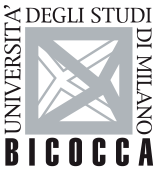

Today, we will learn how to work with real astronomical data using this Jupyter notebook. While specialized software exists for working with these datasets interactively, it often comes with limitations. In contrast, Python offers complete flexibility, allowing you to perform any analysis you need.

The idea is to apply the libraries already explored to perform simple tasks on images taken by the Telecope we have in Bicocca

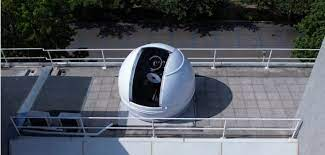

Make sure you have a copy of the data provided on your google Drive. These are the fits files located here: https://drive.google.com/drive/folders/1cevpkmD1wngLl7X5O0z40F0nQlACq7aG

Once you have them on your Google Drive, you can mount the drive here and access the files from Colab.

## <font color='pink'> Exercise 1: Exploring the data

We will work with three images of the star cluster NFC 581 taken in the green filter. Each image was taken using the tracking system of the telescope and with the same integration time. Your tasks are:

**1)** Open the fits files and quickly explore their content.

    BG-Processed_NGC581_g_003.fits
    BG-Processed_NGC581_g_004.fits
    BG-Processed_NGC581_g_005.fits

**2)** Open the `Header` and make sure the content of the files are clear to you.

**3)** Plot the data contained in the files.

**4)** Characterize the noise of the image by plotting the histogram of the background (any region that contains little to no luminous sources), and measuring the *rms* standard deviation.

** Hints **

To select a region you can either use the external package `regions` (https://astropy-regions.readthedocs.io/en/latest/index.html#), or do it yourself. To do it using the `regions` package, follow the documentation online. To do it yourself, you can follow the steps explained below:


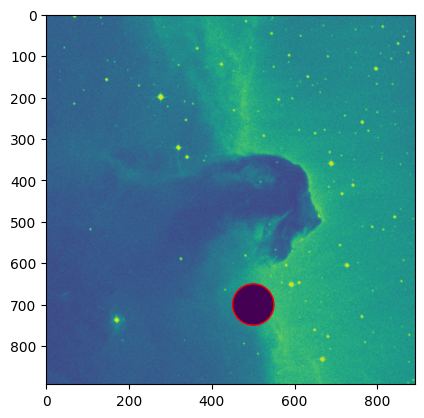

In [8]:
# Example on how to select a region. This code selects a circular region and sets
# to 0 the values of the pixels belonging to this region.

from astropy.utils.data import download_file
from astropy.io import fits
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np

# We first load the data:
image_file = download_file('http://data.astropy.org/tutorials/FITS-images/HorseHead.fits', cache=True )
hdu_list = fits.open(image_file)
image_data = hdu_list[0].data

# Select, for example, a circle of radius 50 pixels around (x0,y0)=(500,700).

# Get the data inside this circle. For this we first define the extent of the data in pixels:
ydim, xdim = np.shape(image_data)
x = np.arange(xdim)
y = np.arange(ydim)
XX, YY = np.meshgrid(x,y)

# Select the data:
x0 = 500
y0 = 700
RCircle = 50
R2 = ((XX-x0)**2 + (YY-y0)**2)
kcircle = np.where(R2 <= RCircle**2)

# As an example, we modifiy the data of the image at the mask's location
image_data[kcircle] = 0

plt.imshow(image_data)

# Plot the circle for reference
circle = patches.Circle((500,700), radius=RCircle, fill=False, color='r')
plt.gca().add_patch(circle)

plt.show()

## <font color=pink> Exercise 2: Improving the Signal-To-Noise Ratio </font>

A common technique to enhance the signal-to-noise (SN) ratio in images is **stacking multiple exposures**. Since photon counts follow a **Poisson distribution**, the signal from luminous sources increases **faster** than the inherent noise. Thus, summing images **naturally reduces measurement errors**. Meanwhile, background noise is largely **random**. This will be well justified in the Telescope Lab, or during the Master degree if you continue with Astronomy.   

For random errors, the resulting error when stacking **$N$ images**, each with the same background noise **$\sigma_{b}$**, is:  

$\sigma_{b,f}^2 = \displaystyle\sum_{i} \sigma^2_{b,i} = N \sigma^2_{b}$,  

which simplifies to:  

$\sigma_{b,f} = N^{1/2} \sigma_{b}$.  

For the case of **averaging** these images, the error becomes:  

$\sigma_{b,f} = \displaystyle\frac{1}{N} N^{1/2} \sigma_{b} =  \displaystyle\frac{1}{N^{1/2}} \sigma_{b}$.  

Thus, averaging **$N$ images** reduces the error by a factor of **$N^{-1/2}$**.  

**YOUR TASK**  

1) Determine the positon of a bright star and follow this stars across each of the three images. You will notice they are not perfectly aligned due to small tracking errors.
2) Measure the position of the stars in each image and save the coordinates in a `cvs` table.
3) Align (shift) the images so that the bright star is always in the same pixel.
4) Stack the three shifted images to reduce background noise.  
5) Select a relatively dark region in the image and measure the *rms* standard deviation of the pixels in this region. Compare this value to that of a single image. Does the error decrease as expected by **$\sim N^{-1/2}$**, with **$N=3$**?  
6) Plot the histogram of background pixels for both a single image and the stacked image.  

You can find an example solution here: https://colab.research.google.com/drive/1cI8Q0sW1bMWQl2KD4NP0MxGRP89ZURRf?usp=sharing

In [11]:
# Work on the Exercise here:
#=================================











